In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Demand_data

In [2]:
cd = os.getcwd()
extra_path_D = 'Demand_data.csv'
path_demand = os.path.join(cd, extra_path_D)

In [3]:
df_demand = pd.read_csv(path_demand)
display(df_demand)

,Voll,Demand_Segment,Cost_of_Demand_Curtailment_per_MW,Max_Demand_Curtailment,$/MWh,Rep_Periods,Timesteps_per_Rep_Period,Sub_Weights,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3
0,50000.0,1.0,1.00,1.000,2000.0,1.0,4380.0,4380.0,0.0,7637.0,2181.0,1041.0
1,NaN,2.0,0.90,0.040,1800.0,NaN,NaN,NaN,1.0,7027.0,2006.5,958.0
2,NaN,3.0,0.55,0.024,1100.0,NaN,NaN,NaN,2.0,6983.5,1994.5,952.0
3,NaN,4.0,0.20,0.003,400.0,NaN,NaN,NaN,3.0,7425.5,2120.5,1012.5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8143.0,2325.5,1110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_demand_h = df_demand[['Time_Index', 'Demand_MW_z1', 'Demand_MW_z2', 'Demand_MW_z3']].copy(deep=True)
df_demand_h

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3
0,1,7850,2242,1070
1,2,7424,2120,1012
2,3,7107,2029,969
3,4,6947,1984,947
4,5,6922,1977,944
...,...,...,...,...
8755,8756,9923,3797,1339
8756,8757,9461,3621,1277
8757,8758,9018,3452,1217
8758,8759,8551,3281,1154


In [7]:
df_demand_2h = df_demand_h.rolling(2).mean().iloc[1::2].reset_index(drop=True)

# Reset the Time_Index after merging
df_demand_2h['Time_Index'] = range(len(df_demand_2h))

df_demand_2h

,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3
0,0,7637.0,2181.0,1041.0
1,1,7027.0,2006.5,958.0
2,2,6983.5,1994.5,952.0
3,3,7425.5,2120.5,1012.5
4,4,8143.0,2325.5,1110.0
...,...,...,...,...
4375,4375,10453.5,2985.5,1425.0
4376,4376,11568.0,3303.5,1577.5
4377,4377,10742.5,3549.5,1457.5
4378,4378,9239.5,3536.5,1247.0


In [10]:
df_demand.loc[0, 'Rep_Periods'] = 1
df_demand.loc[0, 'Timesteps_per_Rep_Period'] = 4380
df_demand.loc[0, 'Sub_Weights'] = 4380
df_demand_dropped = df_demand.drop(df_demand.columns[-4:], axis=1)

In [14]:
df_demand_2h_tot = pd.concat([df_demand_dropped,df_demand_2h], axis=1)
display(df_demand_2h_tot)

,Voll,Demand_Segment,Cost_of_Demand_Curtailment_per_MW,Max_Demand_Curtailment,$/MWh,Rep_Periods,Timesteps_per_Rep_Period,Sub_Weights,Time_Index,Demand_MW_z1,Demand_MW_z2,Demand_MW_z3
0,50000.0,1.0,1.00,1.000,2000.0,1.0,4380.0,4380.0,0.0,7637.0,2181.0,1041.0
1,NaN,2.0,0.90,0.040,1800.0,NaN,NaN,NaN,1.0,7027.0,2006.5,958.0
2,NaN,3.0,0.55,0.024,1100.0,NaN,NaN,NaN,2.0,6983.5,1994.5,952.0
3,NaN,4.0,0.20,0.003,400.0,NaN,NaN,NaN,3.0,7425.5,2120.5,1012.5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8143.0,2325.5,1110.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_demand_2h_tot.to_csv(path_demand, index = False)

## Fuels_data.csv

In [6]:
import os 

cd = os.getcwd()
extra_path_F = 'Fuels_data.csv'
path_fuel = os.path.join(cd, extra_path_F)
df_fuels = pd.read_csv(path_fuel)
df_demand_2h = df_fuels.rolling(2).mean().iloc[1::2].reset_index(drop=True)
df_demand_2h['Time_Index'] = range(len(df_demand_2h))

df_demand_2h.to_csv(path_fuel, index=False)
display(df_demand_2h)


,Time_Index,CT_NG,ME_NG,MA_NG,None
0,0,2.75153,2.75153,2.66653,0.0
1,1,5.45000,5.45000,5.28000,0.0
2,2,5.45000,5.45000,5.28000,0.0
3,3,5.45000,5.45000,5.28000,0.0
4,4,5.45000,5.45000,5.28000,0.0
...,...,...,...,...,...
4375,4375,3.78000,3.78000,4.28000,0.0
4376,4376,3.78000,3.78000,4.28000,0.0
4377,4377,3.78000,3.78000,4.28000,0.0
4378,4378,3.78000,3.78000,4.28000,0.0


In [10]:
df_demand_2h = df_fuels.iloc[:1].copy()
df_rolled = df_fuels.iloc[1:].rolling(2).mean().iloc[1::2].reset_index(drop=True)
df_demand_2h = pd.concat([df_demand_2h, df_rolled], ignore_index=True)
df_demand_2h['Time_Index'] = range(len(df_demand_2h))
display(df_demand_2h)

,Time_Index,CT_NG,ME_NG,MA_NG,None
0,0,0.05306,0.05306,0.05306,0.0
1,1,5.45000,5.45000,5.28000,0.0
2,2,5.45000,5.45000,5.28000,0.0
3,3,5.45000,5.45000,5.28000,0.0
4,4,5.45000,5.45000,5.28000,0.0
...,...,...,...,...,...
4376,4376,3.78000,3.78000,4.28000,0.0
4377,4377,3.78000,3.78000,4.28000,0.0
4378,4378,3.78000,3.78000,4.28000,0.0
4379,4379,3.78000,3.78000,4.28000,0.0


In [11]:
df_demand_2h.to_csv(path_fuel, index=False)

## Generators_variability.csv

In [7]:
cd = os.getcwd()
extra_path_CF = 'Generators_variability.csv'
path_CF = os.path.join(cd, extra_path_CF)
df_CF = pd.read_csv(path_CF)
df_CF_2h = df_CF.rolling(2).mean().iloc[1::2].reset_index(drop=True)
df_CF_2h['Time_Index'] = range(len(df_CF_2h))
display(df_CF_2h)

,Time_Index,MA_natural_gas_combined_cycle,MA_solar_pv,CT_natural_gas_combined_cycle,CT_onshore_wind,CT_solar_pv,ME_natural_gas_combined_cycle,ME_onshore_wind,MA_battery,CT_battery,ME_battery
0,0,1.0,0.00000,1.0,0.596602,0.00000,1.0,0.901169,1.0,1.0,1.0
1,1,1.0,0.00000,1.0,0.670794,0.00000,1.0,0.884062,1.0,1.0,1.0
2,2,1.0,0.00000,1.0,0.313178,0.00000,1.0,0.803777,1.0,1.0,1.0
3,3,1.0,0.00000,1.0,0.336000,0.00000,1.0,0.676412,1.0,1.0,1.0
4,4,1.0,0.30345,1.0,0.164677,0.31120,1.0,0.302763,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4375,4375,1.0,0.32140,1.0,0.277520,0.29840,1.0,0.776012,1.0,1.0,1.0
4376,4376,1.0,0.03900,1.0,0.702799,0.03975,1.0,0.809617,1.0,1.0,1.0
4377,4377,1.0,0.00000,1.0,0.646924,0.00000,1.0,0.655674,1.0,1.0,1.0
4378,4378,1.0,0.00000,1.0,0.374766,0.00000,1.0,0.665775,1.0,1.0,1.0


In [9]:
df_CF_2h.to_csv(path_CF, index=False)

## Plot 15min TDR RepPeriods

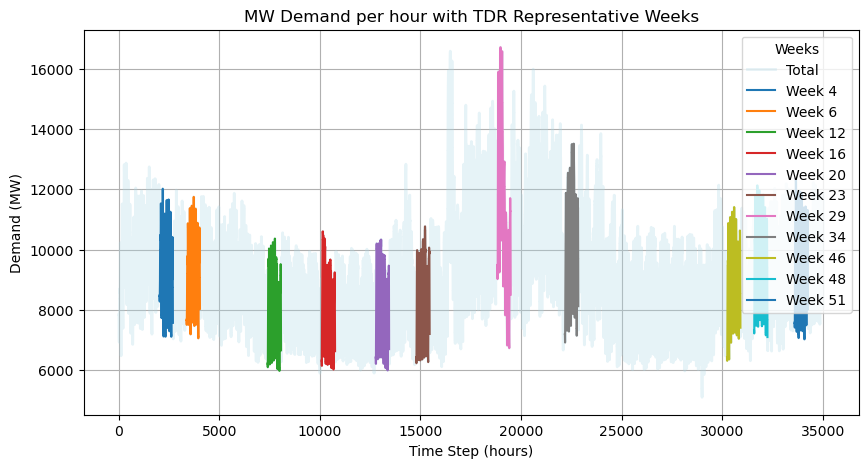

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files into pandas DataFrames
Period_map = pd.read_csv(r"xxx", na_values="NA")
demand = pd.read_csv(r"xxx", na_values="NA")

# Find array of unique representative periods
rep_periods = Period_map["Rep_Period"].unique()

# Create an array of the time steps and MW values of each representative period
weeks_demand = []
for i in rep_periods:
    start_idx = 168*0.5* i - 83 # Start index
    end_idx = 168*0.5* i        # End index to include all necessary rows

    # Create the DataFrame for this week
    week_temp_demand = pd.DataFrame({
        'Week': [i] * (end_idx - start_idx),  # Repeat 'Week' for the correct number of rows
        'hour': demand.loc[start_idx:end_idx - 1, "Time_Index"].values,  # Adjust slicing
        'MW': demand.loc[start_idx:end_idx - 1, "Demand_MW_z1"].values   # Adjust slicing
    })

    # Append this week's data to the list
    weeks_demand.append(week_temp_demand)

# Combine with Total (pre TDR)
demand_plot = pd.DataFrame({
    'Week': ['Total']*8760*0.5,
    'hour': demand["Time_Index"].values,
    'MW': demand["Demand_MW_z1"].values
})

# Combine the Total demand data and the representative weeks data
weeks_demand_df = pd.concat(weeks_demand)
demand_with_TDR = pd.concat([weeks_demand_df, demand_plot])

# Convert hour and MW to appropriate types
demand_with_TDR['hour'] = demand_with_TDR['hour'].astype(int)
demand_with_TDR['MW'] = demand_with_TDR['MW'].astype(float)

# Plot using Matplotlib
plt.figure(figsize=(10, 5))

# Then, plot the "Total" week last
grp_total = demand_with_TDR[demand_with_TDR['Week'] == 'Total']
plt.plot(grp_total['hour'], grp_total['MW'], label='Total', linewidth=2, color='lightblue', alpha=0.3)

# First, plot all representative weeks (excluding "Total")
for key, grp in demand_with_TDR.groupby(['Week']):
    if key != ('Total',):
        plt.plot(grp['hour'], grp['MW'], label=f'Week {key[0]}')

# Customize the plot
plt.title('MW Demand per hour with TDR Representative Weeks')
plt.xlabel('Time Step (hours)')
plt.ylabel('Demand (MW)')
plt.legend(title="Weeks")
plt.grid(True)

# Show the plot
plt.show()

,hour,MW
Week,,
4,98868,1597008.0
8,211764,1682912.0
12,324660,1765813.0
17,465780,1540427.0
24,663348,1584903.0
29,804468,1473768.0
34,945588,1574394.0
46,1284276,1439513.0
48,1340724,1333848.0
